# PCA

PCA (Principal Component Analysis) is an unsupervised dimensionality reduction technique that transforms the features of a dataset into fewer uncorrelated (orthogonal) principal components. These components are linear combinations of the original features, ordered by the amount of variance they explain. This allows us to retain the most important information while reducing the number of features in the original dataset. For example, in the field of genomics, PCA is routinely used to analyze and visualize bulk or single-cell gene sequencing data, which contains the expression values of thousands of genes.

## Data

In [1]:
from sklearn.datasets import load_iris

In [2]:
X, y = load_iris(return_X_y=True, as_frame=True)
print(X.shape, y.shape)

(150, 4) (150,)


In [3]:
y.nunique()

3

In [4]:
num_samples, n_features = X.shape

In [5]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

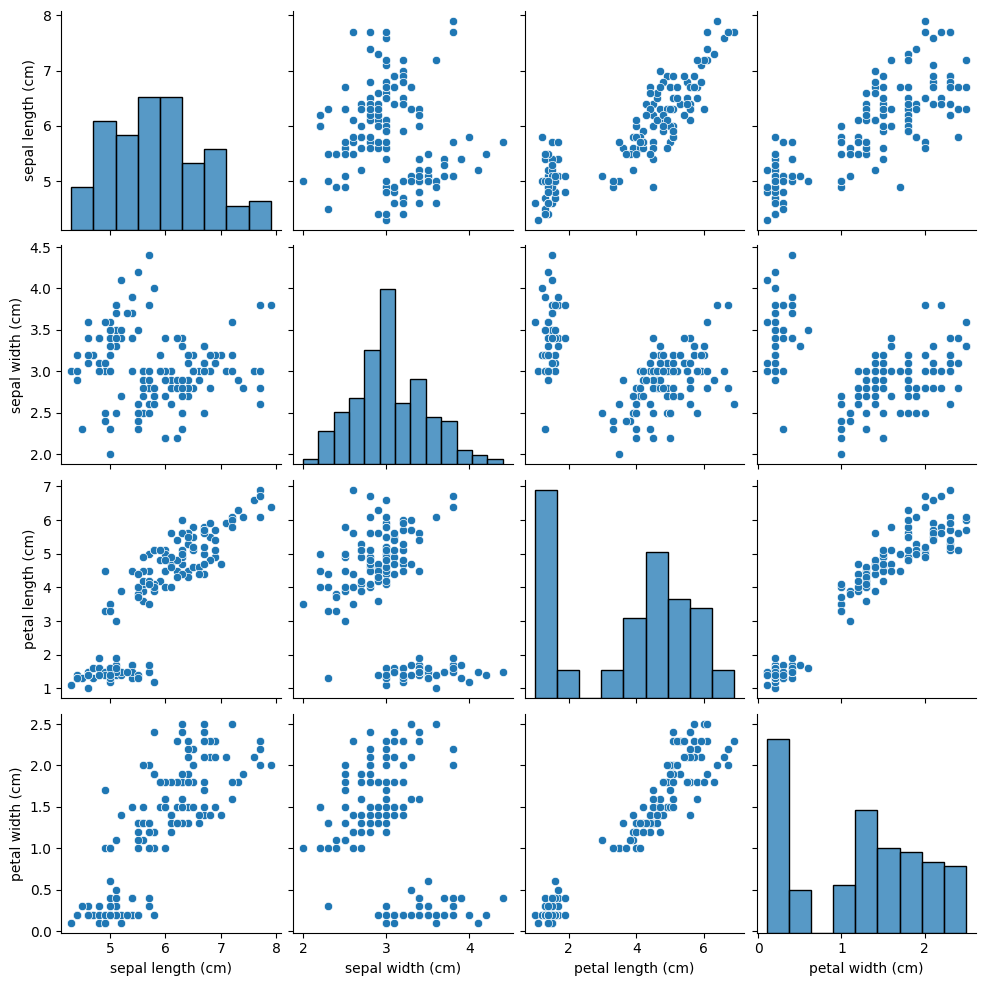

In [7]:
# visualize the correlation between features
sns.pairplot(X)

In [8]:
# convert to numpy arrays
X = X.to_numpy()
y = y.to_numpy()

## Implementation

In [9]:
import numpy as np

In [10]:
# mean center the data
X_centered = X - np.mean(X, axis=0)

In [11]:
# calculate covariance matrix
cov = X_centered.T @ X_centered / (num_samples - 1)
cov.shape

(4, 4)

In [12]:
# get eigenvalue sand eigenvectors, use eigh as cov is symmetric and to match sklearn results
eigenvalues, eigenvectors = np.linalg.eigh(cov)

In [13]:
# eigenvectors are organized columnwise, transpose to be consistent with sklearn
eigenvectors = eigenvectors.T

In [14]:
# sort both based on eigenvlaues
eigenvectors = eigenvectors[eigenvalues.argsort()[::-1]]
eigenvalues = eigenvalues[eigenvalues.argsort()[::-1]]

eigenvalues

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [15]:
eigenvectors[0]

array([-0.36138659,  0.08452251, -0.85667061, -0.3582892 ])

In [16]:
from sklearn.decomposition import PCA

In [17]:
# check correctness using scikit-learn
pca = PCA(n_components=X.shape[1])
pca.fit(X)

PCA(n_components=4)

In [18]:
eigenvalues_sklearn = pca.explained_variance_
eigenvectors_sklearn = pca.components_

In [19]:
eigenvalues_sklearn

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [20]:
eigenvectors_sklearn[0]

array([ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ])

In [21]:
np.allclose(eigenvalues, eigenvalues_sklearn)

True

In [22]:
# use abs here because the sign maybe opposite
np.allclose(np.abs(eigenvectors), np.abs(eigenvectors_sklearn))

True

## Visualization

In [23]:
# choose the first two PCs for visualization in a 2D plot
pc = eigenvectors[:2]
pc.shape

(2, 4)

In [24]:
# transform X
X_transformed = X @ pc.T
X_transformed.shape

(150, 2)

[Text(0.5, 1.0, 'PCA analysis of the Iris Detaset'),
 Text(0.5, 0, 'PC1'),
 Text(0, 0.5, 'PC2')]

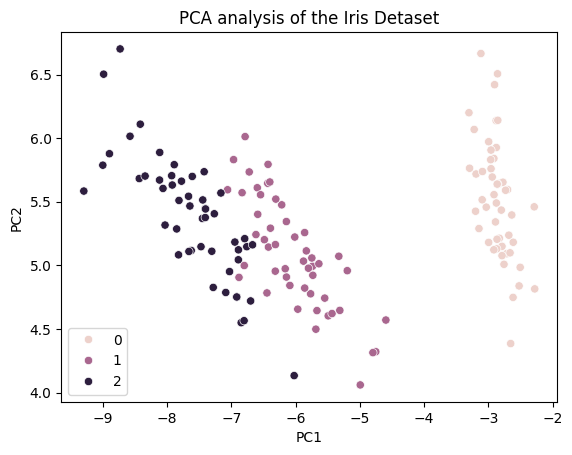

In [25]:
ax = sns.scatterplot(x=X_transformed[:, 0], y=X_transformed[:, 1], hue=y)
ax.set(title="PCA analysis of the Iris Detaset", xlabel="PC1", ylabel="PC2")